# RMS Titanic Disaster Prediction
This Machine Learning(ML) project is to predict what sort of passengers were likely to survive in the Titanic disaster occurred during the maiden voyage on April 15, 1912. 

There were 1502 killed out of 2224 passengers and crew.
The task is to use ML techniques to predict what sorts of people were likely to survive the tragedy.

For this prediction, we will use SVM classification and also Random Forest classification using scikit-learn library.

The main goal of this project is to understand and learn how to tackle ML project.

#### Group Members:
<pre>Maryam Mohseni (qq302114)</pre>
<pre>Ajanthan Rajalingam (X349143)</pre>

Step 1: Setup - Import Python Packages

Step 2: Get Data

Step 3: Analysis the Data

Step 4: Prepare the Data for ML Algorithm
    1. Feature Engineering/Create Feature
    2. Drop Columns
    3. Data Visualization
    4. Correlation Heat Map
    5. Split the Training Data
    6. Scale & One Hot Encoding
Step 5: ML Model Predictions
    1. RandomForestClassifier
    2. SVM
Step 6: Predict the Test Data

Step 7: Conclusion

## Setup - Import Python Packages


In [1]:
# We would be using Python packages like pandas, numpy, seaborn and mathplotlib.
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os
import time

# to make this notebook's output stable across runs
RS = np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Get Data

In [2]:
# Download the dataset from the following link: https://www.kaggle.com/c/3136/download-all
# and store it under /data/

train_csv = 'data/train.csv'
test_csv = 'data/test.csv'

# load the train.csv in to panda dataFrame
df_train = pd.read_csv(train_csv)

## Analysis the Data
Review the structure of the dataset to understand what features can be build our model on.

In [3]:
# view the shape of the train set
print("Number of instances(passangers) in training set is" , df_train.shape[0])
print("Number of columns in training set is", df_train.shape[1])

# view train dataframe
df_train.head()

Number of instances(passangers) in training set is 891
Number of columns in training set is 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### column descriptions
Description of the non self explanatory columns

<ul>
    <li>Survived: 1 - Survived or 0 - died</li>
    <li>Pclass: Passenger's class</li>
    <li>SibSp: Number of siblings/spouses aboard</li>
    <li>Parch: Number of parents/children aboard</li>
    <li>Embarked: Port of embarkation</li>
</ul>

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# check for NaN (Missing) values
num_of_nan = df_train.isnull().sum()
num_of_nan = num_of_nan[num_of_nan != 0]
print(num_of_nan)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
# With out cleaning the data just find out the persentage of passangers survived by port
port = df_train.groupby('Embarked').aggregate(np.mean)
port

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [8]:
total = np.count_nonzero(df_train['PassengerId'])
survived = np.count_nonzero(df_train['Survived'])
percent_survived = (survived/total) * 100

print('Total number of passengers in training set is %i' %total)
print('The number of passengers survived in training set is %i' %survived)
print('Percentage of survial is %.2f percent' %percent_survived)

port[['Age', 'Fare']]

Total number of passengers in training set is 891
The number of passengers survived in training set is 342
Percentage of survial is 38.38 percent


,Age,Fare
Embarked,,
C,30.814769,59.954144
Q,28.089286,13.276030
S,29.445397,27.079812


From the above data, about 55 % of passangers embarked from port C survived. If you check the 'Fare' column the average fair is 59.95. It is pretty clear that a higher survival rate is associated with higher fares. Let's not make any conclusion here, but it is an intersting data.

In [9]:
females = df_train[df_train['Sex'] == 'female']
females_survived = np.count_nonzero(females['Survived'])
print('Females who Survived = %i' %females_survived)

males = df_train[df_train['Sex'] == 'male']
males_survived = np.count_nonzero(males['Survived'])
print('Males who Survived = %i' %males_survived)

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

Females who Survived = 233
Males who Survived = 109


,Sex,Survived
0,female,0.742038
1,male,0.188908


Most of the women(74%) made it alive than men(18.89%).

In [10]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Percentage of people survived by 'Passenger's class'. 

62% of the Passengers in class 1 survived.  This shows that higher the passenger class, the higher the survival rate is.

## Prepare the Data for ML Algorithm

### Feature Engineering/Create Feature

The Name column may not be useful, but we extract the title and create a new column.

In [11]:
df_train['Title'] = df_train['Name'].str.extract(pat = ' ([A-Za-z]+)\.')
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Some of these titles are similar, so the title can be grouped into list of following titles
<ul>
    <li>Mr</li>
    <li>Mrs</li>
    <li>Miss</li>
    <li>Master</li>
    <li>Royalty</li>
    <li>Special</li>
</ul>

In [12]:
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
df_train['Title'] = df_train['Title'].replace(['Countess', 'Lady', 'Don', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
df_train['Title'] = df_train['Title'].replace(['Col', 'Capt', 'Dr', 'Rev', 'Major'], 'Special')

df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Royalty,0.600000
5,Special,0.277778


In [13]:
#Creating new family_size column - If traveled with family they might have risked their life looking after family members
df_train['Family_Size']=df_train['SibSp']+df_train['Parch'] + 1

### Drop Columns

In [14]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_Size'],
      dtype='object')

In [15]:
# Drop the columns that we feel are not that relevant to our model from train and test data
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']

df_train = df_train.drop(columns = columns_to_drop)

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Size
0,1,0,3,male,22.0,7.2500,S,Mr,2
1,2,1,1,female,38.0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,7.9250,S,Miss,1
3,4,1,1,female,35.0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,8.0500,S,Mr,1


### Data Visualization

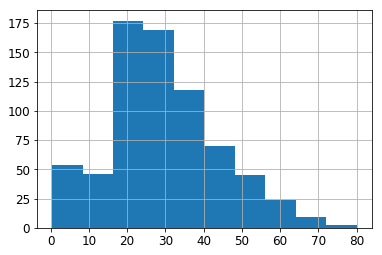

In [17]:
# View the passenger's age
df_train['Age'].hist()

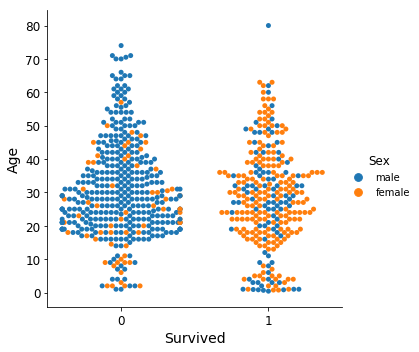

In [18]:
sns.catplot(x="Survived", y="Age", kind="swarm",hue="Sex", data=df_train)

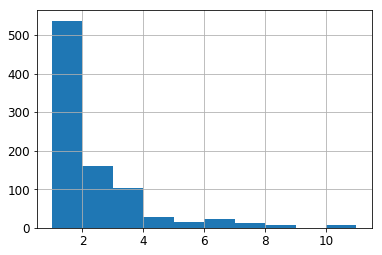

In [19]:
df_train['Family_Size'].hist()

Text(0, 0.5, 'Age')

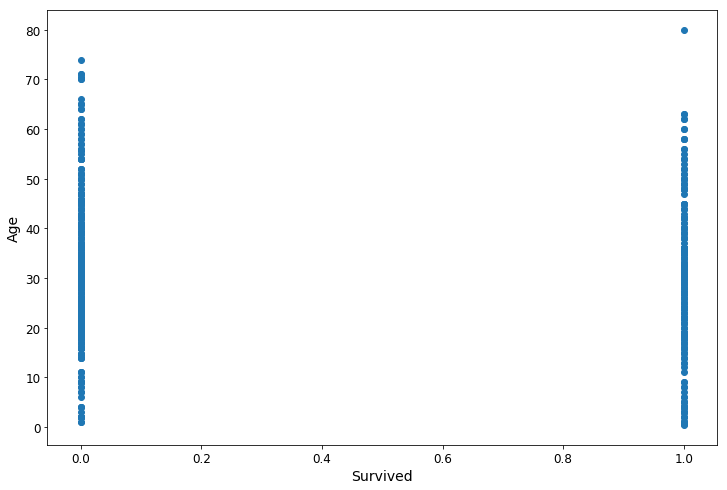

In [20]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(df_train['Survived'], df_train['Age'])

plt.xlabel('Survived')
plt.ylabel('Age')

### Correlation Heat Map

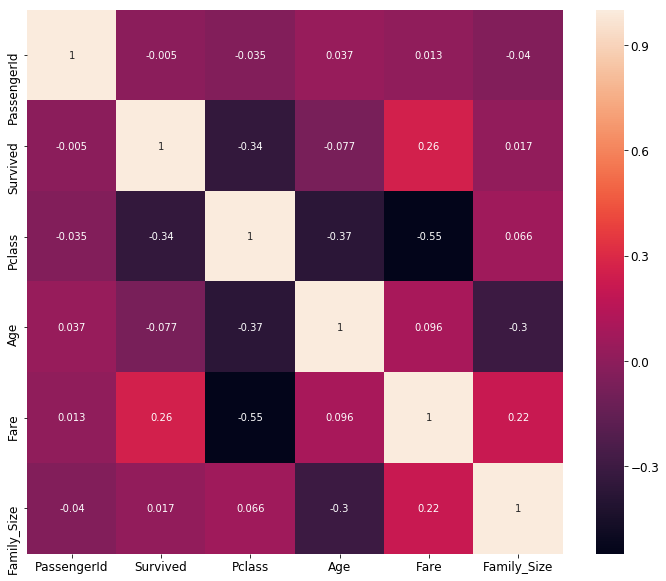

In [21]:
df_train_corr = df_train.corr()

fig. ax = plt.subplots(figsize = (12,10))

sns.heatmap(df_train_corr, annot=True)

The Positive correlations are in lighter colors in the reddish/cream scale and the negative correlations are represented using darker colors in the purple/black scale.

### Split the Training Data

In [22]:
# split data into training and testing set
from sklearn.model_selection import train_test_split

X = df_train.drop('Survived', axis = 1)
Y = df_train['Survived'].copy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print("Train set X shape,", x_train.shape)
print("Train set y shape,", y_train.shape)
print()
print("Test set X shape,", x_test.shape)
print("Test set X shape,", y_test.shape)

Train set X shape, (712, 8)
Train set y shape, (712,)

Test set X shape, (179, 8)
Test set X shape, (179,)


### Scale & One Hot Encoding

In [23]:
from sklearn.impute import SimpleImputer         # Use SimpleImputer to fix the null values
from sklearn.pipeline import Pipeline            # Transformation Pipelines
from sklearn.preprocessing import StandardScaler # Using StandardScaler for normalizating the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# numeric features to impute
X_train_num = x_train.select_dtypes(include=[np.number])

# numeric attributes
num_attributes = list(X_train_num)

# categorical attribute
cat_attributes = ["Sex"]

# pipeline for the numeric attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #fill the missing values with the median value of total bed room column
        ('std_scaler', StandardScaler())
    ])

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attributes),
        ("cat_pipeline", OneHotEncoder(), cat_attributes)
    ])
    
x_train_prepared = full_pipeline.fit_transform(x_train)


## ML Model Predictions
Let's trying out the following basic predictive models on the training and testing data.
    <ul>
        <li>Random Forest Classifier</li>
        <li>Support Vector Machines (SVM)</li>
    </ul>

### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

def build_random_forest_classifier(x_train, y_train):
    model = RandomForestClassifier(n_estimators = 100, random_state=RS)
    
    start_time = time.time()
    model.fit(x_train, y_train)
    traning_time = time.time() - start_time

    print("Ans: Time taken to train Random Forest classification is %.2f seconds" % traning_time)
    
    return model

In [25]:
from sklearn.metrics import accuracy_score

rnd_clf_model = build_random_forest_classifier(x_train_prepared, y_train)

x_train_predictions = rnd_clf_model.predict(x_train_prepared)

acc_rnd = accuracy_score(y_train, x_train_predictions)

print("Ans: The accuracy score on the train set is %.4f" % acc_rnd)

Ans: Time taken to train Random Forest classification is 0.13 seconds
Ans: The accuracy score on the train set is 1.0000


The training set is overfitting the training data. The reason is that Decision Tree/Random Forest classifier continues until it completely classifies the classes (if there is no limitation or stopping parameter). So we need to use "Regularization/hyper-parameter tunning" to avoid overfitting for example adding "max_leaf_node=16" then the accuracy score will be less than 1. We did not add the code for all these steps here because of time limitation.

In [26]:
#test
x_test_prepared = full_pipeline.fit_transform(x_test)
y_pred_rf = rnd_clf_model.predict(x_test_prepared)

print("Ans: The accuracy score on the test set is %.4f" % accuracy_score(y_test, y_pred_rf))

Ans: The accuracy score on the test set is 0.8212


### SVM

In [27]:
from sklearn.svm import LinearSVC

clf_svm = LinearSVC(penalty="l2", dual=False, tol=1e-5)
clf_svm.fit(x_train_prepared, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
     verbose=0)

In [28]:
y_pred_svm = clf_svm.predict(x_test_prepared)
acc_svm = accuracy_score(y_test, y_pred_svm)
print('SVM accuracy: ', acc_svm)

SVM accuracy:  0.7988826815642458


In [29]:
#Use the grid search to find the best estimator
from sklearn.model_selection import GridSearchCV

penalties = ['l1', 'l2']
tolerances = [1e-3, 1e4, 1e-5]

param_grid = {'penalty': penalties, 'tol': tolerances}

grid_search = GridSearchCV(LinearSVC(dual=False), param_grid, cv=3)
grid_search.fit(x_train_prepared, y_train)

grid_search.best_params_

{'penalty': 'l1', 'tol': 0.001}

In [30]:
best_svm_clf = LinearSVC(penalty="l1", dual=False, tol=1e-3)
best_svm_clf.fit(x_train_prepared, y_train)
y_pred_svm = best_svm_clf.predict(x_test_prepared)
acc_svm = accuracy_score(y_test, y_pred_svm)
print('SVM accuracy: ', acc_svm)

SVM accuracy:  0.7988826815642458


Surprisingly, best SVM classifier (after grid serach) works the same as first SVM classifier (grid search in this case did not help much). So it seems that random forest classifier works better. Now, I think we need to do all data transformations steps for the "test.csv", then feed it into random forest classifier and then predict the y values and then submit it to Kaggle!
So here, we will prepare test.csv to feed in to the model.

## Predict the Test Data

In [31]:
# load the test.csv in to panda dataFrame
df_test = pd.read_csv(test_csv)

#Feature Engineering
#The Name column may not be useful, but we extract the title and create a new column
df_test['Title'] = df_test['Name'].str.extract(pat = ' ([A-Za-z]+)\.')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess', 'Don', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
df_train['Title'] = df_train['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Special')

#Creating new family_size column - If traveled with family they might have risked their life looking after family members
df_test['Family_Size']=df_test['SibSp']+df_test['Parch'] + 1

# Drop the columns that we feel are not that relevant to our model from train and test data
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df_test = df_test.drop(columns = columns_to_drop)
df_test.shape

(418, 8)

In [32]:
x_FinalTest_prepared = full_pipeline.fit_transform(df_test)
y_FinalTest_predictions = rnd_clf_model.predict(x_FinalTest_prepared)
y_FinalTest_predictions.shape


(418,)

In [33]:
#Build a CSV file with these predictions (respecting the format excepted by Kaggle)
df_result=pd.DataFrame(y_FinalTest_predictions, index= np.arange(892, 1310), columns=['Survived'])
df_result.index.name = 'PassengerId'
df_result.to_csv(r'data/TestPredictions.csv')

## Conclusion

In [34]:
model = pd.DataFrame({'Method': ['Random Forest Classifier','SVM'], 'Score': [acc_rnd, acc_svm]})
model.sort_values(by='Score', ascending=False)

,Method,Score
0,Random Forest Classifier,1.000000
1,SVM,0.798883


This table shows the accuracy score for the training set for these two models. As mentioned above Random Forest overfits for training data as there is regularization/hyper parameter tunning added to this model. However, as mentioned above it works better than SVM on the test set as its accuracy score is higher that SVM so we picked this model (Random Forest) and applied to the test.csv which we do not have the lables and the predicted values should be uploaded into Kaggle.

Credit:
    (Basic Feature Engineering with the Titanic Data)https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/